In [43]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date

In [44]:
start_date = '2020-01-01'

hm = {}
for symbol in ['QQQ','TQQQ']:
    ticker = yf.Ticker(symbol)
    history = ticker.history(interval='1wk', start=start_date, end=date.today()) # prices are adjusted for splits
    history.index = history.index.date
    print(f'{symbol}\thistory: {len(history)}w') #\t{ticker.info["currency"]}\t{ticker.info["longName"]}')
    hm[symbol] = history

QQQ	history: 272w
TQQQ	history: 272w


In [45]:
df = pd.DataFrame({k: v['Close'] for k, v in hm.items()})
prices = df

weeks = 1
df = df.pct_change(periods=weeks)

display(df.median())

QQQ     0.006606
TQQQ    0.017259
dtype: float64

In [ ]:
df['TQQQx'] = df['TQQQ'] / df['QQQ']

print(f'TQQQ/QQQ ratio median: {df.TQQQx.median():.3f}')

tqqq_positive = df['TQQQx'][df['QQQ'] > 0].median()
tqqq_negative = df['TQQQx'][df['QQQ'] < 0].median()

print(f"TQQQ/QQQ ratio median when QQQ is positive: {tqqq_positive:.3f}")
print(f"TQQQ/QQQ ratio median when QQQ is negative: {tqqq_negative:.3f}")

TQQQ/QQQ ratio median: 3.011
TQQQ/QQQ ratio median when QQQ is positive: 2.692
TQQQ/QQQ ratio median when QQQ is negative: 3.465


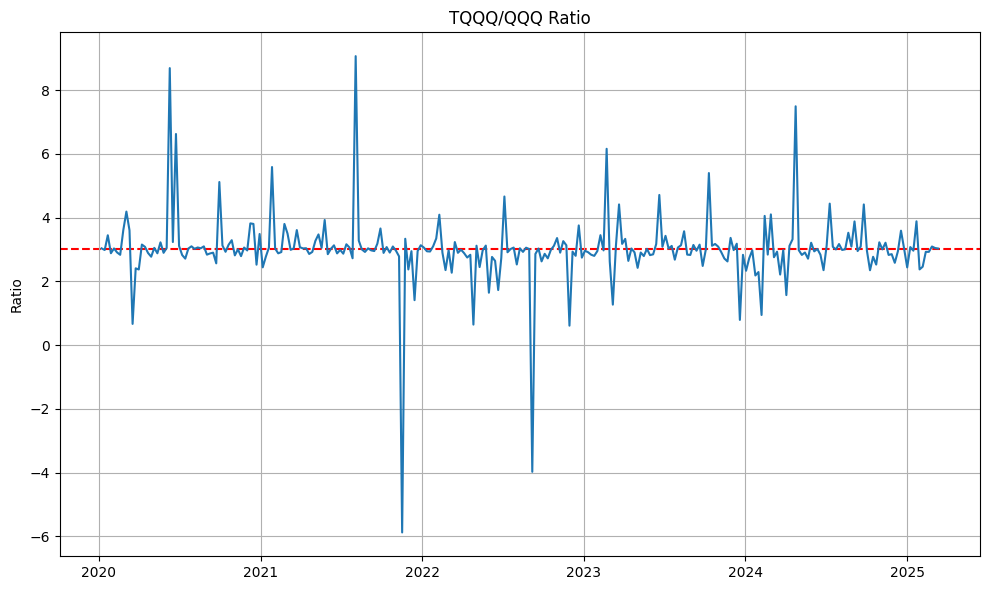

In [47]:

plt.figure(figsize=(10, 6))
df.TQQQx.plot()
plt.axhline(y=3, color='r', linestyle='--', zorder=1)
plt.grid(True)
plt.title('TQQQ/QQQ Ratio')
plt.ylabel('Ratio')

plt.tight_layout()


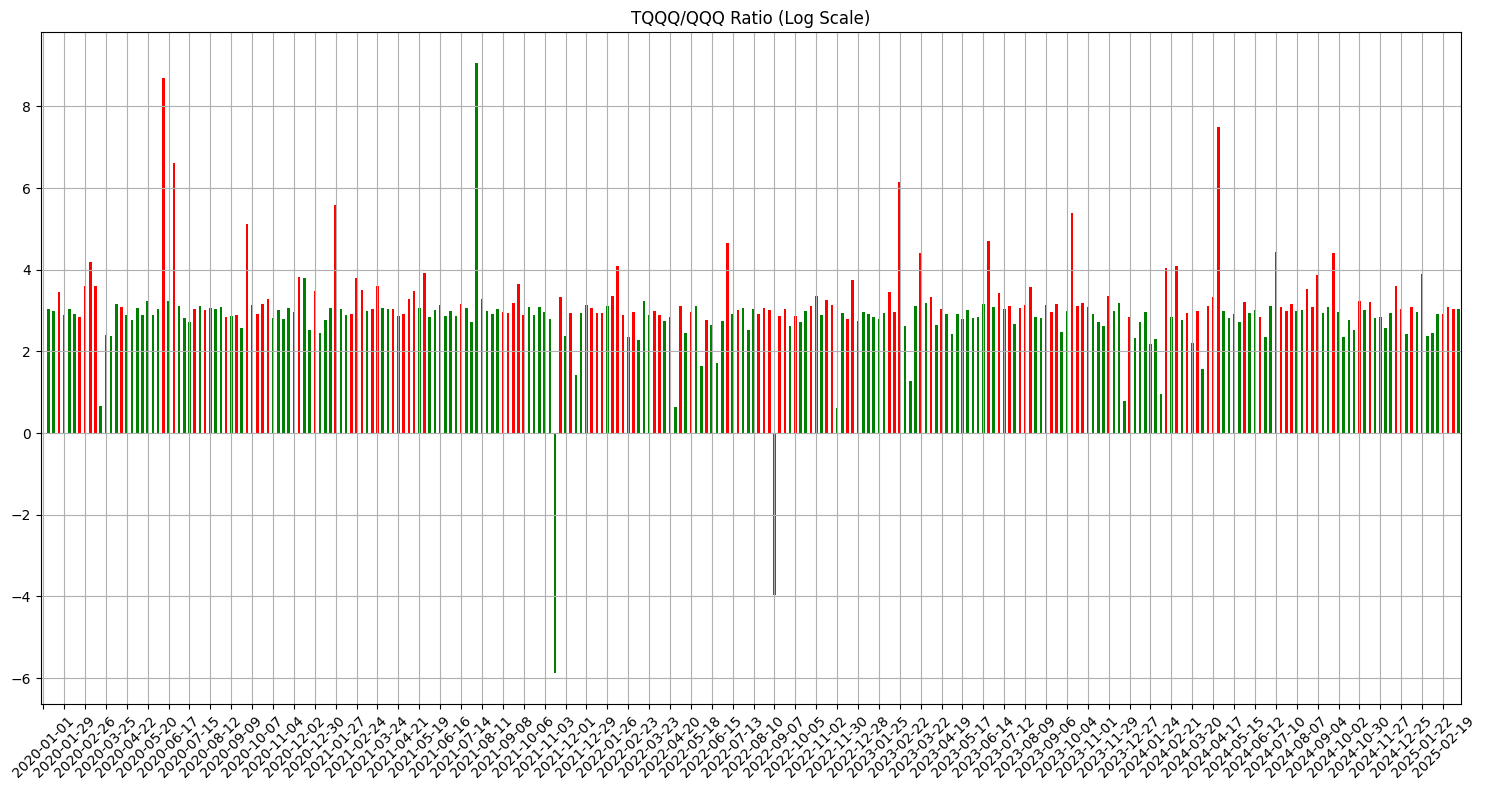

In [48]:
plt.figure(figsize=(15, 8))
colors = ['green' if x > 0 else 'red' for x in df['QQQ']]
df['TQQQx'].plot(kind='bar', color=colors)
# plt.yscale('log')
plt.grid(True)
plt.title('TQQQ/QQQ Ratio (Log Scale)')
plt.xticks(range(0, len(df.index), 4), [str(x) for x in df.index[::4]], rotation=45)
plt.tight_layout()